In [1]:
import os.path
import re

from matplotlib import pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize

import pandas as pd

In [2]:
prediction_file = os.path.join("datasets", "raw", "predictions.csv")

In [3]:
df = pd.read_csv(prediction_file)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27735 entries, 0 to 27734
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          27735 non-null  object 
 1   abuse_pred    27735 non-null  float64
 2   sexual_score  27735 non-null  float64
dtypes: float64(2), object(1)
memory usage: 650.2+ KB


In [5]:
df.describe()

,abuse_pred,sexual_score
count,27735.000000,27735.000000
mean,0.538371,1.374424
std,0.287852,0.731756
min,0.120989,0.720338
25%,0.217798,0.938002
50%,0.597233,1.050537
75%,0.826082,1.433477
max,0.926533,3.494215


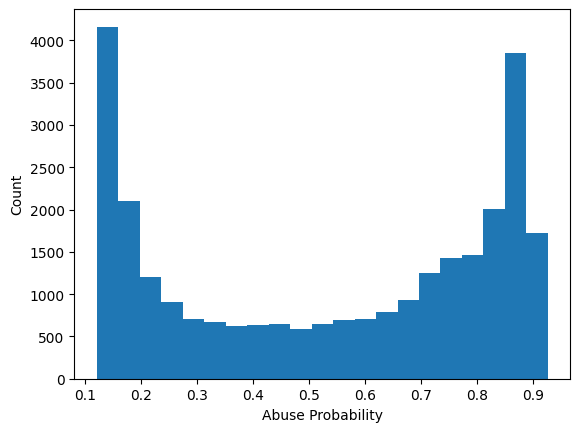

In [6]:
plt.hist(df["abuse_pred"], bins="auto")
plt.xlabel("Abuse Probability")
plt.ylabel("Count")

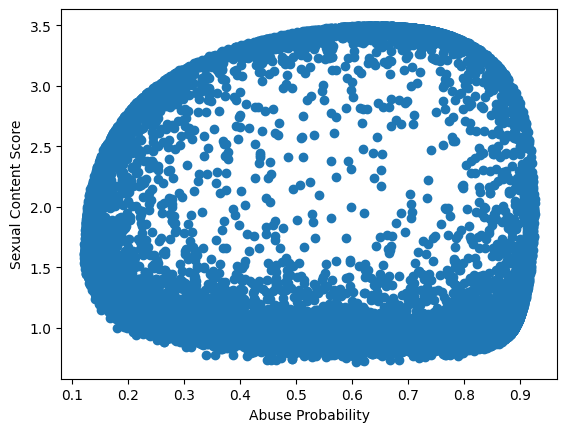

In [7]:
plt.scatter(df["abuse_pred"], df["sexual_score"])
plt.xlabel("Abuse Probability")
plt.ylabel("Sexual Content Score")

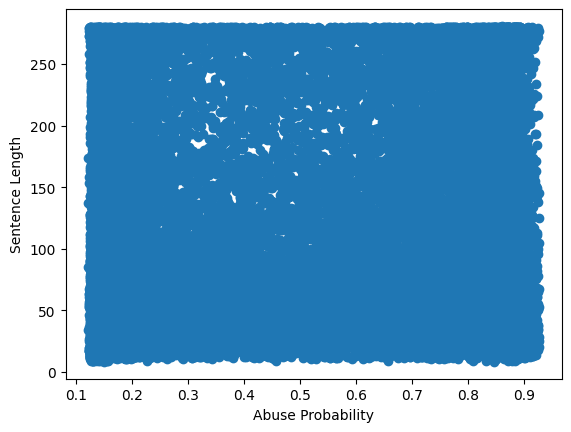

In [8]:
plt.scatter(df["abuse_pred"], df["text"].str.len())
plt.xlabel("Abuse Probability")
plt.ylabel("Sentence Length")

In [9]:
binary_abuse = df["abuse_pred"] >= 0.5

In [10]:
selective_sexual_score = df["sexual_score"][binary_abuse]
selective_sexual_score.describe()

count    15555.000000
mean         1.317940
std          0.845747
min          0.720338
25%          0.908703
50%          0.960105
75%          1.061991
max          3.494215
Name: sexual_score, dtype: float64

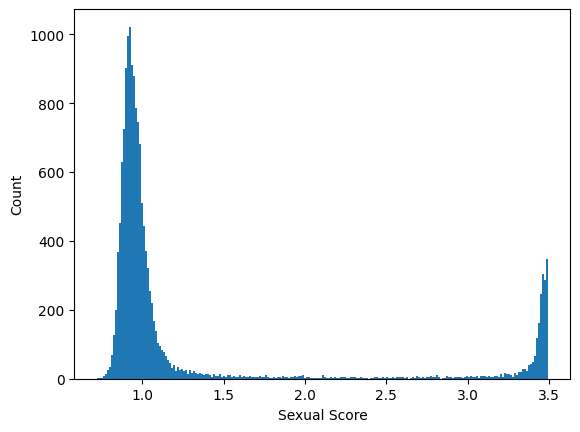

In [11]:
plt.hist(selective_sexual_score, bins="auto")
plt.xlabel("Sexual Score")
plt.ylabel("Count")

In [13]:
with open("stopwords.txt") as fp:
    STOP_WORDS = set(fp.read().splitlines())

In [14]:
emoj_regex = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U00002500-\U00002BEF"  # chinese char
    "\U00002702-\U000027B0"
    "\U00002702-\U000027B0"
    "\U000024C2-\U0001F251"
    "\U0001f926-\U0001f937"
    "\U00010000-\U0010ffff"
    "\u2640-\u2642"
    "\u2600-\u2B55"
    "\u200d"
    "\u23cf"
    "\u23e9"
    "\u231a"
    "\ufe0f"  # dingbats
    "\u3030"
    "]+",
    re.UNICODE,
)

unusual_chars_regex = re.compile(r"[,)({}[\]\.:;`_–\-``!‘’''“”?\-।/—%\|]+")

In [21]:
import numpy as np


def word_tokenize_nepali(text: str):
    # Remove emojis
    text = re.sub(emoj_regex, "", text)

    text = re.sub(r"\d+", " ", text)  # remove any digits
    text = re.sub(unusual_chars_regex, " ", text)
    text = text.replace("#", "").replace(
        "_", " "
    )  # remove #, and break words containing underscore
    text = re.sub(
        r"\s+", " ", text
    )  # replace multiple whitespaces with single whitespace
    return tuple(token for token in word_tokenize(text) if token not in STOP_WORDS)

In [22]:
tokenized_series = df["text"][binary_abuse].apply(word_tokenize_nepali)

In [ ]:
tokenized_series

1        (अदालतले, घोक्रेठ्याक, लगाएर, निकाल्नु, आफै, र...
4        (फिनी, हराको, थाहा, गहॅुका, गेडा, गन्ने, नगरौ,...
5        (दिमाग, नभयेका, क्लास्स, वाला, चिन्छन, बामदेव,...
6        (बाबुराम, प्रचण्ड, रअ, डुलुवा, भतुवा, जगत, दुन...
7        (चोर, औले, जिउदै, रहेछ, देशमा, रामराज्य, तेसैल...
                               ...                        
27728    (उपत्यकाको, फोहोर, विकृत, हुनुमा, सरकारको, नीत...
27729               (एऊटा, गर्यो, भात, हान्यो, कन्डो, लात)
27731                                (नौटंकी, अंकल, बोलिए)
27732    (कुकुर, भुस्याहा, जसरी, नेता, भनौदा, सामन्ती, ...
27734    (काठमाडौँमा, भाडामा, बसेर, पढिरहेका, आदिवासी, ...
Name: text, Length: 15555, dtype: object

In [24]:
tokens = np.concatenate(tokenized_series.to_numpy())

In [25]:
word_freq = FreqDist(tokens)

In [ ]:
word_freq.most_common(20)

[('झोले', 1402),
 ('कुकुर', 1074),
 ('मार्ने', 965),
 ('देश', 906),
 ('बलात्कार', 844),
 ('कबीर', 672),
 ('काम', 654),
 ('मान्छे', 630),
 ('नेता', 610),
 ('बोका', 569),
 ('एउटा', 532),
 ('इज्जत', 530),
 ('सरकार', 509),
 ('दिन', 495),
 ('नालायक', 470),
 ('छाडा', 469),
 ('नेपाली', 462),
 ('जनता', 454),
 ('पार्टी', 428),
 ('नेपाल', 425)]